# Tinting grayscale image

### Dr. Tirthajyoti Sarkar, Fremont, CA 94536

It can be useful to artificially tint an image with some color, either to highlight particular regions of an image or maybe just to liven up a grayscale image. This example demonstrates image-tinting by scaling RGB values and by adjusting colors in the HSV color-space.

In 2D, color images are often represented in RGB—3 layers of 2D arrays, where the 3 layers represent (R)ed, (G)reen and (B)lue channels of the image. The simplest way of getting a tinted image is to **set each RGB channel to the grayscale image scaled by a different multiplier for each channel**. 

For example, multiplying the green and blue channels by 0 leaves only the red channel and produces a bright red image. Similarly, zeroing-out the blue channel leaves only the red and green channels, which combine to form yellow.

In [1]:
import matplotlib.pyplot as plt
from skimage import data
from skimage import color
from skimage import img_as_float

In [2]:
grayscale_image = img_as_float(data.camera()[::2, ::2])
image = color.gray2rgb(grayscale_image)

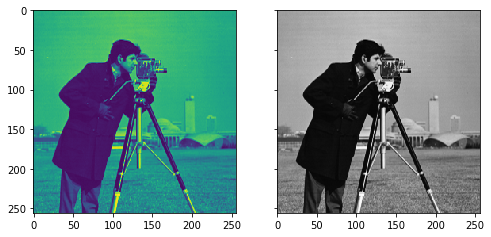

In [4]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4),sharex=True, sharey=True)
ax1.imshow(grayscale_image)
ax2.imshow(image)

### Red amd Yellow multiplier

In [5]:
red_multiplier = [1, 0, 0]
yellow_multiplier = [1, 1, 0]

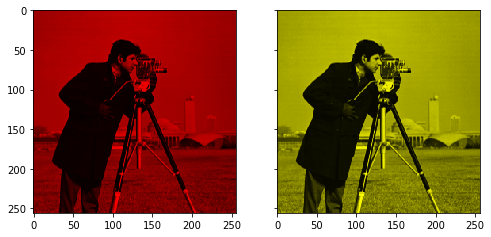

In [6]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4),
                               sharex=True, sharey=True)
ax1.imshow(red_multiplier * image)
ax2.imshow(yellow_multiplier * image)

### RGB space may not be ideal - use HSV channel

In many cases, dealing with RGB values may not be ideal. Because of that, there are many other color spaces in which you can represent a color image. One popular color space is called HSV, which represents hue (~the color), saturation (~colorfulness), and value (~brightness). For example, a color (hue) might be green, but its saturation is how intense that green is —where olive is on the low end and neon on the high end.

In some implementations, the hue in HSV goes from 0 to 360, since hues wrap around in a circle. In scikit-image, however, hues are float values from 0 to 1, so that hue, saturation, and value all share the same scale.

Below, we plot a linear gradient in the hue, with the saturation and value turned all the way up:

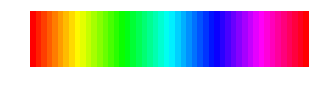

In [7]:
import numpy as np

hue_gradient = np.linspace(0, 1)
hsv = np.ones(shape=(1, len(hue_gradient), 3), dtype=float)
hsv[:, :, 0] = hue_gradient

all_hues = color.hsv2rgb(hsv)

fig, ax = plt.subplots(figsize=(5, 2))
# Set image extent so hues go from 0 to 1 and the image is a nice aspect ratio.
ax.imshow(all_hues, extent=(0, 1, 0, 0.2))
ax.set_axis_off()

### An utility function for RGB - HSV, setting hue and sat and then HSV - RGB back
Now, let’s create a little utility function to take an RGB image and 
1. transform the RGB image to HSV 
2. Set the hue and saturation 
3. Transform the HSV image back to RGB

In [8]:
def colorize(image, hue, saturation=1):
    """ Add color of the given hue to an RGB image.

    By default, set the saturation to 1 so that the colors pop!
    """
    hsv = color.rgb2hsv(image)
    hsv[:, :, 1] = saturation
    hsv[:, :, 0] = hue
    return color.hsv2rgb(hsv)

Using the function above, we plot six images with a linear gradient in the hue and a non-zero saturation:

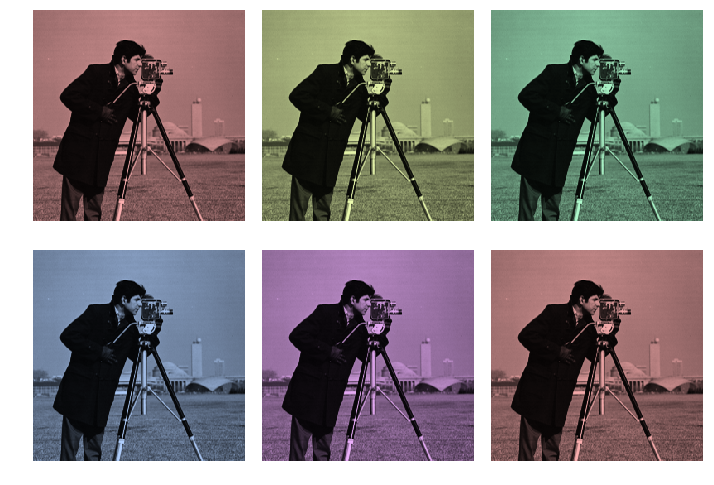

In [11]:
hue_rotations = np.linspace(0, 1, 6)

fig, axes = plt.subplots(figsize=(10,7),nrows=2, ncols=3, sharex=True, sharey=True)

for ax, hue in zip(axes.flat, hue_rotations):
    # Turn down the saturation to give it that vintage look.
    tinted_image = colorize(image, hue, saturation=0.3)
    ax.imshow(tinted_image, vmin=0, vmax=1)
    ax.set_axis_off()
fig.tight_layout()
plt.show()